In [1]:
import timeit
import numpy as np
from qcsim.misc import linear_entanglement_circuit
from qcsim import Simulator

In [2]:
mean_runtimes1 = []
std_runtimes1 = []

num_qubits1 = range(2, 14)
sim1 = Simulator(method='matrix-mul')

for nq in num_qubits1:
    circuit = linear_entanglement_circuit(num_qubits=nq)
    runtimes = timeit.repeat(
        'sim1.run(circuit)', globals=globals(), number=1, repeat=10)
    mean_runtimes1.append(np.mean(runtimes))
    std_runtimes1.append(np.std(runtimes))

mean_runtimes1 = np.array(mean_runtimes1)
std_runtimes1 = np.array(std_runtimes1)

In [3]:
mean_runtimes2 = []
std_runtimes2 = []

num_qubits2 = range(2, 23)
sim2 = Simulator(method='tensor-mul')

for nq in num_qubits2:
    circuit = linear_entanglement_circuit(num_qubits=nq)
    runtimes = timeit.repeat(
        'sim2.run(circuit)', globals=globals(), number=1, repeat=10)
    mean_runtimes2.append(np.mean(runtimes))
    std_runtimes2.append(np.std(runtimes))

mean_runtimes2 = np.array(mean_runtimes2)
std_runtimes2 = np.array(std_runtimes2)

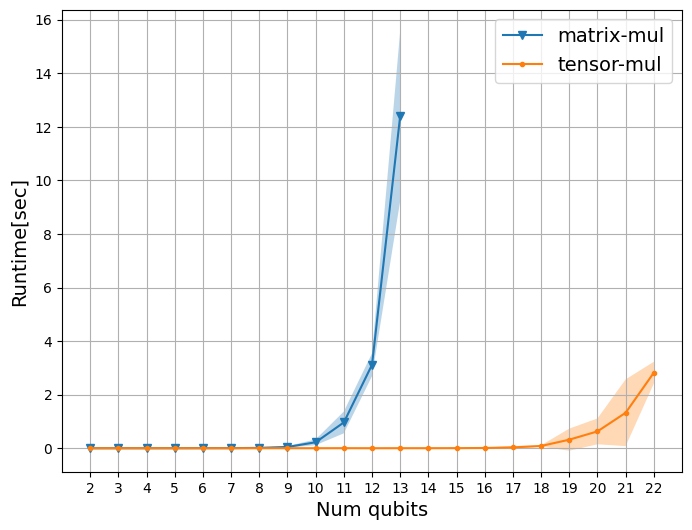

In [4]:
import pylab as plt

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(num_qubits1, mean_runtimes1, marker='v', label='matrix-mul')
y1 = mean_runtimes1 - 5*std_runtimes1
y2 = mean_runtimes1 + 5*std_runtimes1
ax.fill_between(num_qubits1, y1=y1, y2=y2, alpha=0.3)

ax.plot(num_qubits2, mean_runtimes2, marker='.', label='tensor-mul')
y1 = mean_runtimes2 - 5*std_runtimes2
y2 = mean_runtimes2 + 5*std_runtimes2
ax.fill_between(num_qubits2, y1=y1, y2=y2, alpha=0.3)

ax.set_xticks(num_qubits2)
ax.set_xlabel('Num qubits', fontsize=14)
ax.set_ylabel('Runtime[sec]', fontsize=14)
ax.legend(fontsize=14)
ax.grid()

plt.show()